In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
import numpy as np

# Simple neural network with one hidden layer
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # Input to hidden layer
        self.fc2 = nn.Linear(2, 1)  # Hidden to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the network
model = SimpleNN()

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Dummy data: 4 samples, 2 features each
inputs = torch.tensor([[0.5, 0.3], [0.2, 0.8], [0.9, 0.4], [0.7, 0.6]])
targets = torch.tensor([[1.0], [0.0], [1.0], [0.0]])

# TensorBoard setup
writer = SummaryWriter('runs/visualize_backprop')

# **Add the model graph to TensorBoard**
writer.add_graph(model, inputs)
writer.flush()  # Ensure the graph is written to disk

# Training loop
for epoch in range(10):  # Run for 10 epochs
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    optimizer.zero_grad()  # Zero gradients
    loss.backward()        # Backpropagation
    optimizer.step()       # Update weights

    # Log the loss value and gradients to TensorBoard
    writer.add_scalar('Loss/train', loss.item(), epoch)
    
    # Log gradients and weights for each layer
    for name, param in model.named_parameters():
        writer.add_histogram(f'{name}.grad', param.grad, epoch)
        writer.add_histogram(f'{name}.weights', param, epoch)

    # Print the loss at each epoch
    print(f'Epoch [{epoch+1}/10], Loss: {loss.item():.4f}')

# Close the writer
writer.close()


Epoch [1/10], Loss: 0.3013
Epoch [2/10], Loss: 0.2991
Epoch [3/10], Loss: 0.2969
Epoch [4/10], Loss: 0.2949
Epoch [5/10], Loss: 0.2929
Epoch [6/10], Loss: 0.2910
Epoch [7/10], Loss: 0.2891
Epoch [8/10], Loss: 0.2873
Epoch [9/10], Loss: 0.2856
Epoch [10/10], Loss: 0.2839


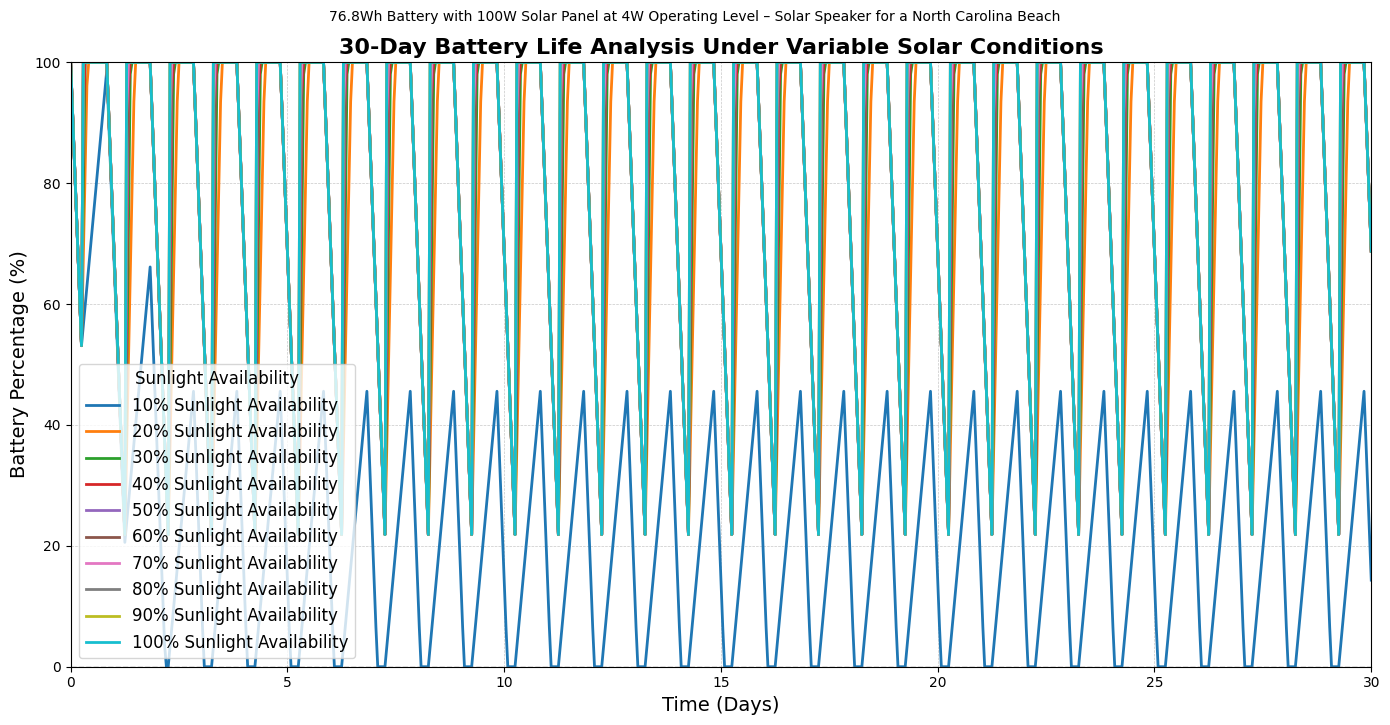

The minimum sunlight availability required to last 30 days is approximately 10%.


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
battery_capacity = 76.8  # Wh
power_draw = 6 # W (constant power consumption)
solar_panel_power = 100  # W (solar panel output)
solar_efficiency = 0.85  # Efficiency of solar panel
sunlight_hours = range(6, 20)  # 6 AM to 8 PM (14 hours/day)
daily_sunlight_scenarios = np.linspace(0.1, 1.0, 10)  # Sunlight availability scenarios from 10% to 100%
hours_per_day = 24
total_hours = 30 * hours_per_day  # 30 days, hourly simulation

# Initialize simulation for each sunlight scenario
results = {}

for scenario in daily_sunlight_scenarios:
    current_battery = battery_capacity  # Start with a full battery in Wh
    battery_levels = [100]  # Start at 100% battery

    for hour in range(total_hours):
        # Determine if it's daytime or nighttime
        current_hour = hour % hours_per_day
        is_daytime = current_hour in sunlight_hours

        if is_daytime:
            # Daytime - solar panel can provide power
            solar_energy_hour = solar_panel_power * solar_efficiency * scenario  # Solar energy per hour (adjusted)
            net_energy = solar_energy_hour - power_draw  # Net energy after powering the load
        else:
            # Nighttime - no solar energy, only discharging
            net_energy = -power_draw

        # Update battery level
        current_battery += net_energy

        # Ensure battery does not exceed capacity or fall below 0
        current_battery = min(max(current_battery, 0), battery_capacity)

        # Record battery percentage
        battery_levels.append((current_battery / battery_capacity) * 100)

    # Store results for this scenario
    results[scenario] = battery_levels

# Plotting
plt.figure(figsize=(14, 8))

for scenario, battery_levels in results.items():
    plt.plot(
        np.linspace(0, 30, total_hours + 1), 
        battery_levels, 
        label=f"{int(scenario * 100)}% Sunlight Availability",
        linewidth=2
    )

# Dashed horizontal line at 0%
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

# Labels and Title
plt.title("30-Day Battery Life Analysis Under Variable Solar Conditions", fontsize=16, fontweight='bold')
plt.suptitle("76.8Wh Battery with 100W Solar Panel at 4W Operating Level – Solar Speaker for a North Carolina Beach",
             fontsize=10, y=0.93)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Battery Percentage (%)", fontsize=14)

# Legend
plt.legend(title="Sunlight Availability", fontsize=12, title_fontsize=12)

# Axes limits
plt.xlim(0, 30)
plt.ylim(0, 100)

# Grid for readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Determine the minimum sunlight percentage to last for 30 days
sufficient_scenarios = [scenario for scenario, battery_levels in results.items() if battery_levels[-1] > 0]

if sufficient_scenarios:
    min_sufficient_scenario = min(sufficient_scenarios)
    print(f"The minimum sunlight availability required to last 30 days is approximately {int(min_sufficient_scenario * 100)}%.")
else:
    print("No scenario could sustain the system for 30 days.")
